In [135]:
import numpy as np 
import pandas as pd

In [136]:
frutas = pd.read_csv("../datasets/frutas.csv")
culmen_columns = ["textura", "color"]
target_column = "fruta"
frutas.head().T

,0,1,2,3,4
peso,120,160,100,180,80
textura,suave,suave,dura,dura,suave
color,amarillo,amarillo,rojo,rojo,verde
fruta,banana,banana,manzana,manzana,manzana


In [137]:
frutas.nunique()

peso       7
textura    2
color      4
fruta      3
dtype: int64

In [138]:
del frutas['peso']

In [139]:
frutas['color'].unique()

array(['amarillo', 'rojo', 'verde', 'naranja'], dtype=object)

In [140]:
frutas['textura'].unique()

array(['suave', 'dura'], dtype=object)

In [141]:
frutas['textura']=frutas['textura'].str.replace('suave','1').str.replace('dura','2')
frutas.textura = pd.to_numeric(frutas.textura, errors='coerce')

frutas['color']=frutas['color'].str.replace('amarillo','1').str.replace('rojo','2').str.replace('verde','3').str.replace('naranja','4')
frutas.color = pd.to_numeric(frutas.color, errors='coerce')


In [142]:

from sklearn.model_selection import train_test_split

data, target = frutas[culmen_columns], frutas[target_column]
data_train, data_test, target_train, target_test = train_test_split(
    data, target, random_state=0
)

In [143]:
from sklearn.tree import DecisionTreeClassifier

model = DecisionTreeClassifier(max_depth=2)
model.fit(data_train, target_train)

DecisionTreeClassifier(max_depth=2)

In [144]:
test_score = model.fit(data_train, target_train).score(data_test, target_test)
print(f"Accuracy of the DecisionTreeClassifier: {test_score:.2f}")

Accuracy of the DecisionTreeClassifier: 1.00


In [146]:
y_predict=model.predict([[2,4]])
y_predict

/home/ruben/Documentos/CE/SAA/lib/python3.9/site-packages/sklearn/base.py:409: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


array(['naranja'], dtype=object)

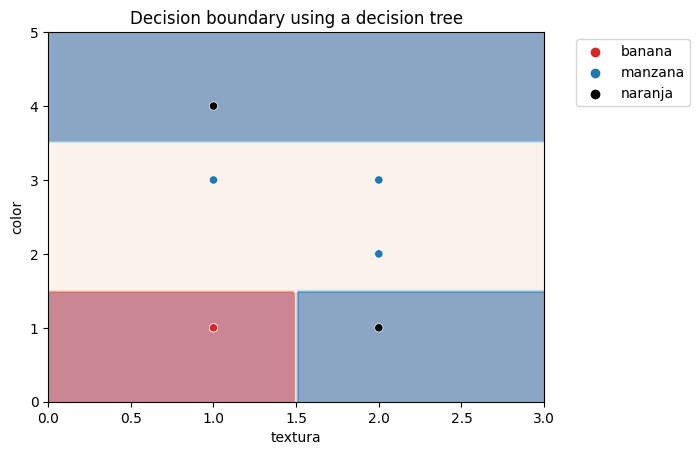

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.inspection import DecisionBoundaryDisplay

palette = ["tab:red", "tab:blue", "black"]
DecisionBoundaryDisplay.from_estimator(
    model, data_train, response_method="predict", cmap="RdBu", alpha=0.5
)
ax = sns.scatterplot(data=frutas, x=culmen_columns[0], y=culmen_columns[1],
                     hue=target_column, palette=palette)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
_ = plt.title("Decision boundary using a decision tree")

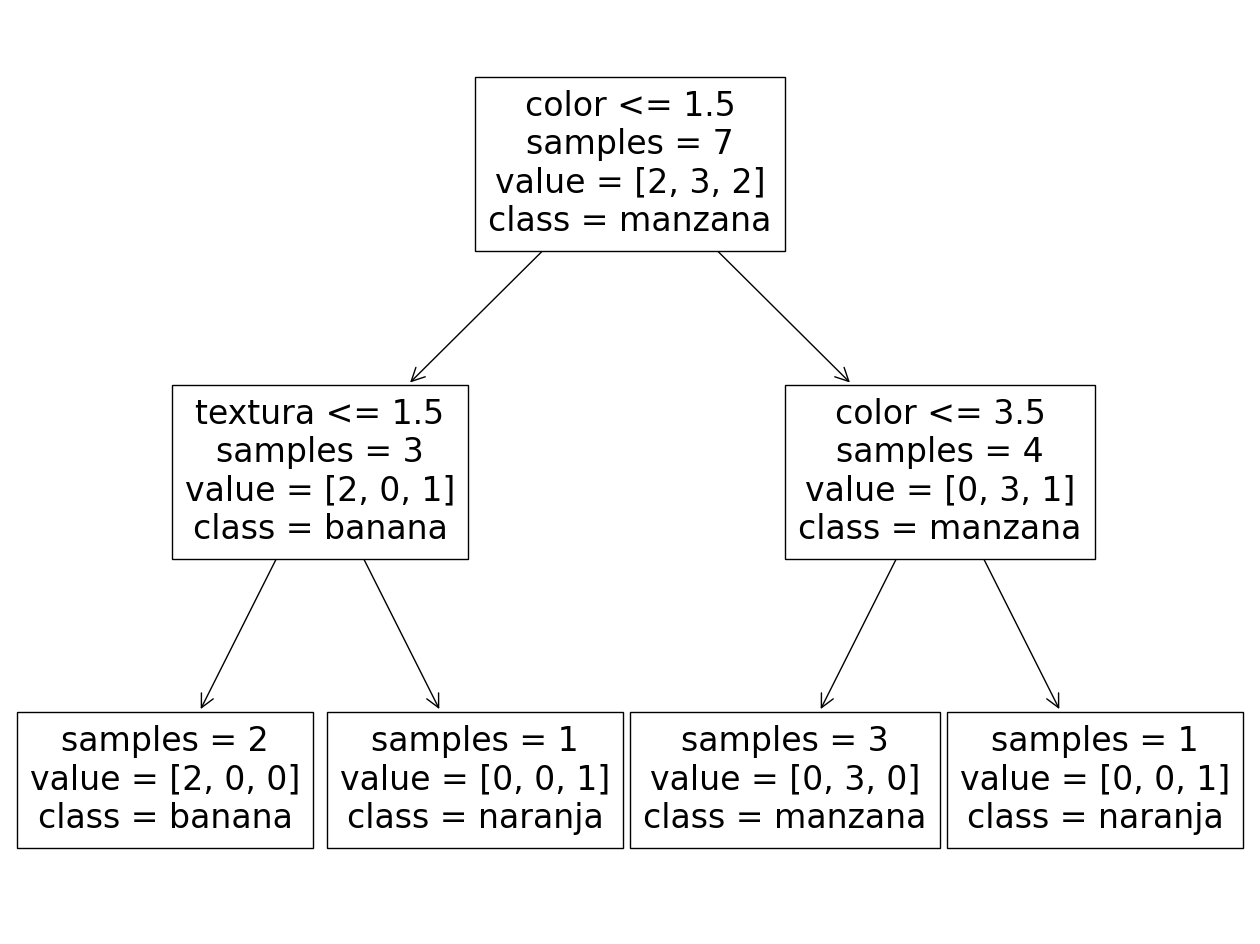

In [ ]:
from sklearn.tree import plot_tree

_, ax = plt.subplots(figsize=(16, 12))
_ = plot_tree(model, feature_names=culmen_columns,
              class_names=model.classes_, impurity=False, ax=ax)